# D-H method による解法

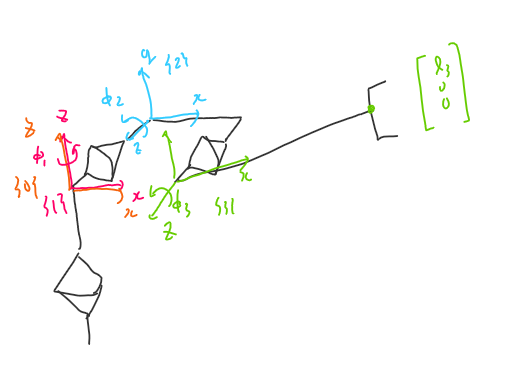

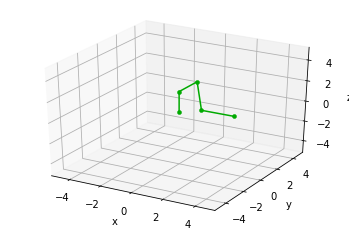

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np

def Rx(th):
    x = np.array([[1, 0, 0], [0, np.cos(th), -np.sin(th)], [0, np.sin(th), np.cos(th)]])
    return x

def Ry(th):
    y = np.array([[np.cos(th), 0, np.sin(th)], [0, 1, 0], [-np.sin(th), 0, np.cos(th)]])
    return y
    
def Rz(th):
    z = np.array([[np.cos(th), -np.sin(th), 0], [np.sin(th), np.cos(th), 0], [0, 0, 1]])
    return z

def T(R, d):
    htemp  = np.array([[0, 0, 0, 1]])
    temp = np.concatenate([R, d], 1)
    T = np.concatenate([temp, htemp])
    return T


import robot_model

# マニピュレータの設定
robot = robot_model.Robot3R()


th1 = 0
th2 = np.pi / 4
th3 = -np.pi / 4


Rz1 = Rz(th1)
d1  = np.array([[0, 0, 2]]).T
T01 = T(Rz1, d1)

Ry2 = Ry(th2)
d2  = np.array([[0, 2, 0]]).T
T12 = T(Ry2, d2)

Ry3 = Ry(th3)
d3  = np.array([[2, -2, 0]]).T
T23 = T(Ry3, d3)


T02 = np.dot(T01, T12)
T03 = np.dot(T02, T23)

l3  = np.array([[2, 0, 0, 1]]).T

robot.joints[1].position = np.dot(T01, np.array([[0, 0, 0, 1]]).T)[:3,0]
robot.joints[2].position = np.dot(T02, np.array([[0, 0, 0, 1]]).T)[:3,0]
robot.joints[3].position = np.dot(T03, np.array([[0, 0, 0, 1]]).T)[:3,0]
robot.joints[4].position = np.dot(T03, l3)[:3,0]

import view_3r_3d
view_3r_3d.view(robot)
